# Neural Networks - Part I

[<font color='#E8800A'>1 - Implement a neural network: methods and evaluation</font>](#one-bullet) <br>
[<font color='#E8800A'>2 - The attributes of a Neural Network</font>](#two-bullet) <br>
[<font color='#E8800A'>3 - Some parameters in Neural Networks</font>](#three-bullet) <br>
    [<font color='#E8800A'>3.1. - The hidden layer</font>](#four-bullet) <br>
    [<font color='#E8800A'>3.2. - The maximum iterations</font>](#five-bullet) <br>

[<font color='#E8800A'>4 - Comparing LR, DT and NN </font>](#six-bullet) <br>        
[<font color='#E8800A'>5 - The importance of scaling (EXERCISE)</font>](#seven-bullet) <br>
    [<font color='#E8800A'>5.1. - MinMax Scaler</font>](#eight-bullet) <br>
    [<font color='#E8800A'>5.2. - Standard Scaler</font>](#nine-bullet) <br>
    [<font color='#E8800A'>5.3. - Robust Scaler</font>](#ten-bullet) <br>




In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
def avg_score(model):
    # apply kfold
    skf = StratifiedKFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    for train_index, val_index in skf.split(X,y):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the validation
        value_val = model.score(X_val,y_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)

def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_iter = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_iter
        count+=1
    return df

<div class="alert alert-block alert-info">
<a class="anchor" id="one-bullet">     

# 1. Implement a neural network: methods and evaluation
</a>    
</div>

__`Step 1`__ Load the dataset Diabetes, define the independent variables and the target and apply train_test_split

In [3]:
diabetes = pd.read_csv(r'diabetes.csv')
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 15, stratify = y)

In [6]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


__`Step 2`__ Import MLPClassifier from sklearn.neural_network

In [7]:
from sklearn.neural_network import MLPClassifier

__`Step 3`__ Using MLPClassifier, create a MLP Classifier instance called model and fit to your training data.

In [8]:
model = MLPClassifier().fit(X_train, y_train)

__`Step 4`__ Check the f1 score and the mean accuracy in validation for the model you created in the previous step.

In [9]:
from sklearn.metrics import f1_score

pred_val = model.predict(X_val)
print('F1 Score:' ,f1_score(y_val, pred_val))
print('Mean Accuracy:' ,model.score(X_val, y_val))

F1 Score: 0.5098039215686274
Mean Accuracy: 0.6753246753246753


<div class="alert alert-block alert-info">
<a class="anchor" id="two-bullet">     

# 2 - The attributes of a Neural Network
</a>    
</div>

__`Step 5`__ Using MLPClassifier, create a MLP Classifier instance called model2, and define the parameter __hidden_layer_sizes = (3)__, and define the __verbose = 10__

In [14]:
model2 = MLPClassifier(hidden_layer_sizes = 3, verbose = 10).fit(X_train, y_train)

Iteration 1, loss = 1.23740971
Iteration 2, loss = 1.15283633
Iteration 3, loss = 1.07272189
Iteration 4, loss = 1.00787628
Iteration 5, loss = 0.95164795
Iteration 6, loss = 0.90143420
Iteration 7, loss = 0.85774865
Iteration 8, loss = 0.82134831
Iteration 9, loss = 0.78905049
Iteration 10, loss = 0.76330389
Iteration 11, loss = 0.74200588
Iteration 12, loss = 0.72522819
Iteration 13, loss = 0.71412734
Iteration 14, loss = 0.70332381
Iteration 15, loss = 0.69612880
Iteration 16, loss = 0.69153376
Iteration 17, loss = 0.68677215
Iteration 18, loss = 0.68358086
Iteration 19, loss = 0.68111394
Iteration 20, loss = 0.67889895
Iteration 21, loss = 0.67705811
Iteration 22, loss = 0.67564979
Iteration 23, loss = 0.67492687
Iteration 24, loss = 0.67402968
Iteration 25, loss = 0.67315837
Iteration 26, loss = 0.67211921
Iteration 27, loss = 0.67131522
Iteration 28, loss = 0.67061954
Iteration 29, loss = 0.66987062
Iteration 30, loss = 0.66914660
Iteration 31, loss = 0.66882555
Iteration 32, los

The error is calculated by quantifying the difference between the predicted output and the desired output. This difference is called "loss" and the function used to calculate the difference is called the "loss function". In this case, the model is optimized by using the log-loss function / cross-entropy:

$$log\_loss = -\frac{1}{N}\sum_{N}^{i=1}y_{i}\cdot log(p(y_{i}))\cdot log(1-p(y_{i}))$$

where $y$ is the label and $p(y)$ is the predicted probability of the point being 1 for all N points.

__`Step 6`__ Plot the loss through the iterations by calling the attribute __loss_curve___

<AxesSubplot:>

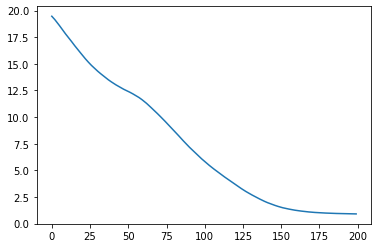

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

losses = model2.loss_curve_
iterations = range(model2.n_iter_)
sns.lineplot(iterations, losses)

__`Step 7`__ Obtain the final loss of your model by calling the attribute __loss___

In [15]:
model2.loss_

0.6604815780165745

__`Step 8`__ Get the weight matrix by calling the attribute __coefs___

In [16]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [20]:
model2.coefs_

[array([[-3.82479045e-02, -1.07138716e-07,  5.83052824e-01],
        [-3.62124335e-01, -2.73348821e-04,  8.17938835e-02],
        [ 5.61579628e-02,  1.15699280e-08, -3.01308049e-03],
        [-2.80534294e-02, -1.45353849e-01,  2.64741426e-01],
        [ 3.66799340e-09,  7.56742221e-04, -4.87074517e-01],
        [-5.20288959e-01, -4.84645109e-02, -6.97425933e-01],
        [ 2.51686139e-01, -3.40509634e-02,  1.69599653e-01],
        [-4.87854134e-01, -5.57899798e-01, -5.99136853e-02]]),
 array([[ 0.3249403 ],
        [-0.75615805],
        [ 0.26026107]])]

<img src="image1_nn.png" alt="Drawing" style="width: 500px;"/>

__`Step 9`__ Get the weights between the input and the hidden layer by calling the attribute __coefs_[0]__

In [21]:
model2.coefs_[0]

array([[-3.82479045e-02, -1.07138716e-07,  5.83052824e-01],
       [-3.62124335e-01, -2.73348821e-04,  8.17938835e-02],
       [ 5.61579628e-02,  1.15699280e-08, -3.01308049e-03],
       [-2.80534294e-02, -1.45353849e-01,  2.64741426e-01],
       [ 3.66799340e-09,  7.56742221e-04, -4.87074517e-01],
       [-5.20288959e-01, -4.84645109e-02, -6.97425933e-01],
       [ 2.51686139e-01, -3.40509634e-02,  1.69599653e-01],
       [-4.87854134e-01, -5.57899798e-01, -5.99136853e-02]])

__`Step 10`__ Get the weights between the hidden layer and the output by calling the attribute __coefs_[1]__

In [22]:
model2.coefs_[1]

array([[ 0.3249403 ],
       [-0.75615805],
       [ 0.26026107]])

__`Step 11`__ Get the bias vector by calling the attribute __intercepts___

In [23]:
model2.intercepts_

[array([-0.13050943, -0.69807693,  0.63568754]), array([-0.63107579])]

<div class="alert alert-block alert-info">
<a class="anchor" id="three-bullet">     

# 3 - Some parameters in Neural Networks
</a>    
</div>

<div class="alert alert-block alert-success">
<a class="anchor" id="four-bullet">    

### 3.1. - The hidden layer
 </a>
    
</div>

__The number of hidden layers__<br>
-	Increase the number of hidden layers might improve the accuracy or might not, it depend on the complexity of the problem
-	Increase the number of hidden layers more than the sufficient ones will cause overfit on training set and the decrease of the accuracy in the validation set

__The number of hidden units__ <br>
-	Using too few neurons in hidden layers will result in underfitting
-	Using too many neurons in the hidden layer may result in overfitting and increase the time it takes to train the neural network

The aim is to keep a good trade-off between the simplicity of the model and the performance accuracy! <br>

__Some rule of thumbs:__
-	The number of hidden neurons should be between the size of the input layer and the size of the output layer
-	The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer
-	The number of hidden neurons should be less than twice the size of the input layer


__`Step 12`__ Create an MLPClassifier with one hidden layer and one neuron and name it __model_simple__

In [24]:
model_simple = MLPClassifier(hidden_layer_sizes=(1))

__`Step 13`__ Create an MLPClassifier with one hidden layer and 8 neurons and name it __model_medium__

In [25]:
model_medium = MLPClassifier(hidden_layer_sizes=(8))

__`Step 14`__ Create an MLPClassifier with four hidden layers and 100 neurons each and name it __model_complex__

In [26]:
model_complex = MLPClassifier(hidden_layer_sizes=(100,100,100,100))

__`Step 15`__ Check the mean accuracy of each model by calling the function _show_results_ and pass as arguments the dataset and the three models.

In [29]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Simple','Medium','Complex'])
show_results(df, model_simple, model_medium, model_complex)

,Time,Train,Validation,Iterations
Simple,0.196+/-0.03,0.647+/-0.01,0.645+/-0.02,186.5+/-27.2
Medium,0.278+/-0.02,0.636+/-0.1,0.607+/-0.09,200.0+/-0.0
Complex,0.903+/-0.35,0.775+/-0.03,0.717+/-0.04,79.3+/-32.3


While the results may differ in different runs, we probably will get the following conclusions:
- The more complex the model, the higher the running time;
- We can have a boost on the performance on our model when we adjust rightly the complexity of it - too simple leads to underfitting, and too complex can lead to overfitting.

<div class="alert alert-block alert-success">
<a class="anchor" id="five-bullet">    

### 3.2. - The maximum iterations
 </a>
    
</div>

By default, sklearn defines the maximum number of iterations as 200. While this could be enough for simple datasets, in complex problems you should try values higher that allow the model to converge.

__`Step 16`__ Create an instance of MLPClassifier, define the max_iter as __20__, the __hidden_layer_sizes=(8)__ and name it as __model_maxiter_20__

In [30]:
model_maxiter_20 = MLPClassifier(max_iter = 20, hidden_layer_sizes=(8))

__`Step 17`__ Create an instance of MLPClassifier, define the max_iter as __200__, the __hidden_layer_sizes=(8)__ and name it as __model_maxiter_200__

In [31]:
model_maxiter_200 = MLPClassifier(max_iter = 200, hidden_layer_sizes=(8))

__`Step 18`__ Create an instance of MLPClassifier, define the max_iter as __1000__, the __hidden_layer_sizes=(8)__ and name it as __model_maxiter_1000__

In [32]:
model_maxiter_1000 = MLPClassifier(max_iter = 1000, hidden_layer_sizes=(8))

__`Step 19`__ Check the mean accuracy of each model by calling the function _show_results_ and pass as arguments the dataset and the three models.

In [33]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['max iter 20','max iter 200','max iter 1000'])
show_results(df, model_maxiter_20, model_maxiter_200, model_maxiter_1000)

,Time,Train,Validation,Iterations
max iter 20,0.032+/-0.0,0.502+/-0.1,0.492+/-0.09,20.0+/-0.0
max iter 200,0.282+/-0.01,0.677+/-0.03,0.663+/-0.05,200.0+/-0.0
max iter 1000,0.546+/-0.29,0.715+/-0.03,0.691+/-0.04,434.7+/-246.9


<div class="alert alert-block alert-info">
<a class="anchor" id="six-bullet">     

# 4 - Comparing LR, DT and NN
</a>    
</div>

Text(0.5, 1.0, "MLP's validation accuracy (with outliers): 93.33%")

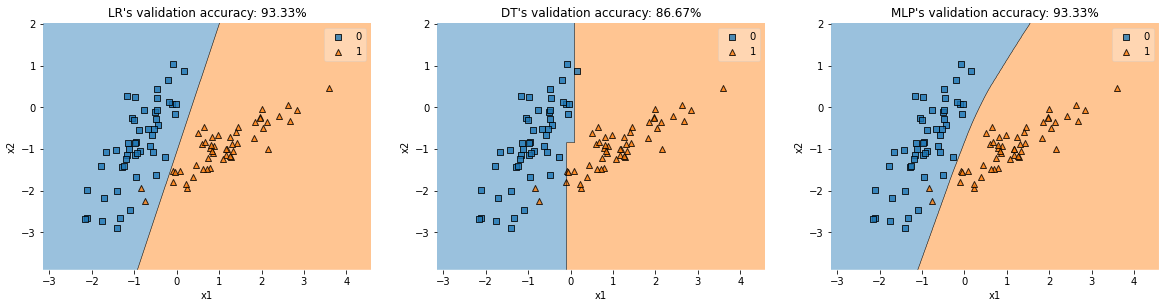

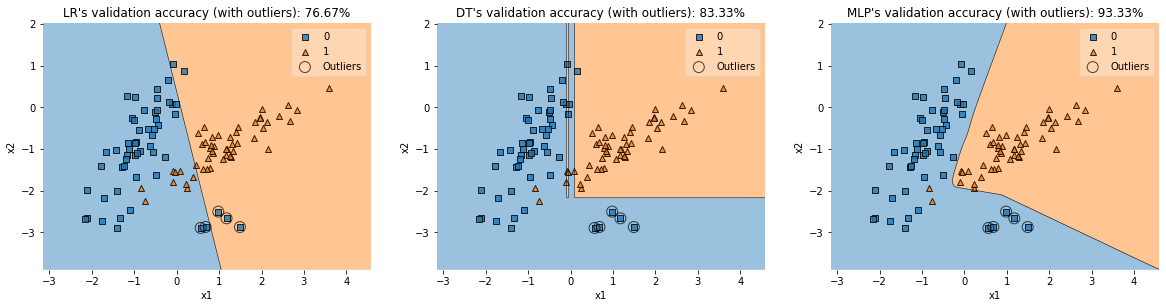

In [35]:
#!pip install mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons

# 1) generate data for make_classification problem
X, y = make_classification(n_features=2, n_redundant=0, random_state=5, n_informative=2, n_clusters_per_class=1)

# 2) artificially introduce 5 outliers
n_out = 5
X_out = np.vstack((np.random.uniform(0.5, 1.5, n_out), np.random.uniform(-3, -2.5, n_out))).transpose()
y_out = np.zeros(X_out.shape[0])

# 3) split the data into training and unseen (validation)
X_training, X_unseen, y_training, y_unseen = train_test_split(X, y, train_size=0.7, random_state=5)
# create an object named as X_train_out that will contain the ouliers
X_train_out = np.vstack((X_training, X_out))
# create an object named y_train_out that will contain the observations with outliers
y_train_out = np.concatenate((y_training, y_out)).astype(int)

# 4) estimate models without outliers 
# 4) 1) instantiate and train a Logistic Regression model
lr = LogisticRegression(random_state=5)
lr.fit(X_training, y_training)
# 4) 2) instantiate and train a Decision Tree model
dt = DecisionTreeClassifier(random_state=5)
dt.fit(X_training, y_training)
# 4) 3) instantiate and train a MLP model
mlp = MLPClassifier(random_state=5, max_iter = 1000)
mlp.fit(X_training, y_training)

# 5) estimate models with outliers 
# 5) 1) instantiate and train a Logistic Regression model
lr_out = LogisticRegression(random_state=5)
lr_out.fit(X_train_out, y_train_out)
# 5) 2) instantiate and train a Decision Tree model
dt_out = DecisionTreeClassifier(random_state=5)
dt_out.fit(X_train_out, y_train_out)
# 5) 3) instantiate and train a MLP model
mlp_out = MLPClassifier(random_state=5, max_iter = 1000)
mlp_out.fit(X_train_out, y_train_out)

# 6) plot classification boundaries
plt.figure(figsize=(20,10))

# 6) 1) LR without outliers
plt.subplot(231)
plot_decision_regions(X=X, y=y, clf=lr)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("LR's validation accuracy: {0:.2f}%".format(100*(lr.score(X_unseen, y_unseen))))

# 6) 2) DT without outliers
plt.subplot(232)
plot_decision_regions(X=X, y=y, clf=dt)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("DT's validation accuracy: {0:.2f}%".format(100*(dt.score(X_unseen, y_unseen))))

# 6) 3) MLP without outliers
plt.subplot(233)
plot_decision_regions(X=X, y=y, clf=mlp)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("MLP's validation accuracy: {0:.2f}%".format(100*(mlp.score(X_unseen, y_unseen))))

# 6) plot classification boundaries
X = np.vstack((X, X_out))
y = np.concatenate((y, y_out)).astype(int)
plt.figure(figsize=(20,10))

# 6) 4) LR with outliers
plt.subplot(234)
plot_decision_regions(X=X, y=y, clf=lr_out, X_highlight=X_out,
                          scatter_highlight_kwargs = {'s': 120, 'label': 'Outliers', 'alpha': 0.7})
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("LR's validation accuracy (with outliers): {0:.2f}%".format(100*(lr_out.score(X_unseen, y_unseen))))

# 6) 5) DT with outliers
plt.subplot(235)
plot_decision_regions(X=X, y=y, clf=dt_out, X_highlight=X_out,
                          scatter_highlight_kwargs = {'s': 120, 'label': 'Outliers', 'alpha': 0.7})
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("DT's validation accuracy (with outliers): {0:.2f}%".format(100*(dt_out.score(X_unseen, y_unseen))))

# 6) 5) MLP with outliers
plt.subplot(236)
plot_decision_regions(X=X, y=y, clf=mlp_out, X_highlight=X_out,
                          scatter_highlight_kwargs = {'s': 120, 'label': 'Outliers', 'alpha': 0.7})
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("MLP's validation accuracy (with outliers): {0:.2f}%".format(100*(mlp_out.score(X_unseen, y_unseen))))

<div class="alert alert-block alert-info">
<a class="anchor" id="seven-bullet">     

# 5 - The importance of scaling (EXERCISE)
</a>    
</div>

In most cases, your dataset will contain features that differ significantly in terms of magnitudes, units and range. Due to the fact that the majority of machine learning algorithms use Euclidean distance between two data points in their computations, this can be a problem.<br><br>

If left on the original format, those algorithms will consider significantly the magnitude of features and this could lead to biased results. <br><br>
As an example, if we consider a variable as weight, the algorithm will work differently if that feature is measured in kilograms or in grams - having a value of 5000 grams will give more "weight" to the feature than having a value of 5 kilograms. <br>The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To suppress this effect, we need to bring all features to the same level of magnitudes.

It is a good practice to normalize the data by putting its mean to zero and its variance to one, or to rescale it by fixing the minimum and the maximum between -1 and 1 or 0 and +1. <br>

<div class="alert alert-block alert-success">
<a class="anchor" id="eight-bullet">    

### 5.1. - MinMax Scaler
 </a>
    
</div>

__`Step 20`__ Import __MinMaxScaler__ from __sklearn.preprocessing__

In [36]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler is the simplest method and consists in rescaling the range of features to scale in range in [0,1] or [-1,1]. The general formula is:

$$x^{'} = \frac{x - min(x)}{max(x) - min(x)}$$

where $x$ is the original value and $x^{'}$ is the normalized one. <br>
To rescale between a tuple of values [a,b], the formula becomes: <br>

$$x^{'} = a + \frac{(x - min(x))(b-a)}{max(x) - min(x)}$$

where $a$ is the minimum value and $b$ the maximum value.

`When to use` 
- Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion);
- Least disruptive to the information in the original data.

`Note`
- Doesn't reduce the importance of outliers.

#### 5.1.1. Rescale between [0,1]

__`Step 21`__ Create an object named __min_max1__ that will contain an instance of __MinMaxScaler()__ fitted to your __X_train__

In [37]:
min_max1 = MinMaxScaler().fit(X_train)

__`Step 22`__ Create an object named __min_max1_X_train__ that will contain the __X_train__ scaled, by calling the method __transform()__ to your fitted instance created in the previous step.

In [38]:
min_max1_X_train = min_max1.transform(X_train)

__`Step 23`__ Similarly to Step 22, create an object named as __min_max1_X_val__ that will transform your __X_val__

In [39]:
min_max1_X_val = min_max1.transform(X_val)

__`Step 24`__ Create an object named __model_min_max1__ that will contain a MLPClassifier model fitted to your scaled training data.

In [40]:
model_min_max1 = MLPClassifier().fit(min_max1_X_train, y_train)

__`Step 25`__ Calculate the mean accuracy of your classifier in your __min_max1_X_val__ and __y_val__ by calling the method __score()__ and define it as __score_minmax1__

In [41]:
model_min_max1.score(min_max1_X_val, y_val)

0.7402597402597403

#### 2.1.2. Rescale between [-1,1]

__`Step 26`__ Similarly to the steps included in the _**topic 2.1.2.**_ , this time apply MinMaxScaler(), but define the parameter __feature_range = (-1,1)__. Check the mean accuracy of your new classifier.

In [42]:
# Create a MinMaxScaler instance that will range between -1 and 1 and fit to your train data
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
# Transform your train data by applying the scale obtained in the previous command
min_max2_X_train = min_max2.transform(X_train)
# Transform your validation data by applying the scale obtained in the first command
min_max2_X_val = min_max2.transform(X_val)
# Create a new classifier and fit to your scaled training data
model_min_max2 = MLPClassifier().fit(min_max2_X_train, y_train)
# Check the mean accuracy of your classifier in your validation data
model_min_max2.score(min_max2_X_val, y_val)

0.7662337662337663

<div class="alert alert-block alert-success">
<a class="anchor" id="nine-bullet">    

### 5.1. - Standard Scaler
 </a>
    
</div>

__`Step 27`__ Import __StandardScaler__ from __sklearn.preprocessing__

In [43]:
from sklearn.preprocessing import StandardScaler

StandardScaler applies standardization to data. <br>
It standardizes a feature by removing the mean and dividing each value by the standard deviation. The formula is:


$$x^{'} = \frac{x - \bar{x}}{\sigma }$$

where $x^{'}$ is the standardized value, $x$ is the original feature, $\bar{x}$ is the average of $x$ and $\sigma$ is its standard deviation.

`When to use` 
- Use it if you know the data distribution is normal;

`Note`
- If you have outliers in your variable, applying StandardScaler will scale most of the data to a small interval;

__`Step 28`__ Create an object named __scaler__ that will contain an instance of __StandardScaler()__ fitted to your __X_train__

In [44]:
scaler = StandardScaler().fit(X_train)

__`Step 29`__ Transform your training dataset using the scaler and define it as a new object named __scaler_X_train__. Do the same for your validation data , and name the new object as __scaler_X_val__

In [45]:
scaler_X_train = scaler.transform(X_train)
scaler_X_val = scaler.transform(X_val)

__`Step 30`__ Create a MLPClassifier named __model_scaler__ and fit to your scaled training data.

In [46]:
model_scaler = MLPClassifier().fit(scaler_X_train, y_train)

__`Step 31`__ Check the mean accuracy of your previous model in your validation data by calling the method __score()__

In [47]:
model_scaler.score(scaler_X_val, y_val)

0.7922077922077922

<div class="alert alert-block alert-success">
<a class="anchor" id="ten-bullet">    

### 5.3. - Robust Scaler
 </a>
    
</div>

__`Step 32`__ Import __RobustScaler__ from __sklearn.preprocessing__

In [48]:
from sklearn.preprocessing import RobustScaler

The RobustScaler scales the data according to the quantile range. <br>
It is an alternative for StandardScaler when in presence of outliers, because those influence the mean/variance in a negative way. <br>In those cases, the interquartile range often give better results. The formula is:


$$x^{'} = \frac{x - Q_{1}(x)}{Q_{3}(x) - Q_{1}(x)}$$

where $x^{'}$ is the scaled value, $x$ is the original feature, $Q_{1}(x)$ is the first quantile of the feature and  $Q_{3}(x)$ is the third quantile.

`When to use` 
- Use if you have outliers and don't want them to have much influence (but removing outliers is always a better option);
- Outliers have less influence than in other methods. The range is larger than MinMaxScaler or StandardScaler.

__`Step 33`__ Similarly to what was done in the previous scalers, apply this time the RobustScaler and check the mean accuracy of a model fitted to your new scaled data.

In [49]:
# Create a RobustScaler instanceand fit to your train data
robust = RobustScaler().fit(X_train)
# Transform your train data by applying the scale obtained in the previous command
robust_X_train = robust.transform(X_train)
# Transform your validation data by applying the scale obtained in the first command
robust_X_val = robust.transform(X_val)
# Create a new classifier and fit to your scaled training data
model_robust = MLPClassifier().fit(robust_X_train, y_train)
# Check the mean accuracy of your classifier in your validation data
model_robust.score(robust_X_val, y_val)

0.7597402597402597

__`Step 34`__ Plot the different results using a barplot.

<AxesSubplot:>

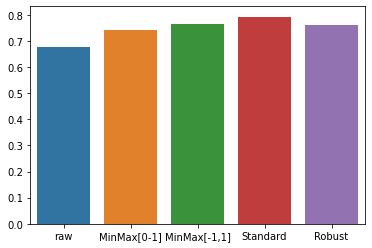

In [50]:
x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y = [model.score(X_val, y_val), model_min_max1.score(min_max1_X_val, y_val), 
    model_min_max2.score(min_max2_X_val, y_val),model_scaler.score(scaler_X_val, y_val),
    model_robust.score(robust_X_val, y_val)]
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x, y)